# Lab 6: K-Means

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans2

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [10,5]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

 

## Task 1:  Import and explore the data

We are going to be using K-Means to explore the flea beetle dataset which contains measurements of three different types of beetles.

[VIDEO LINK](https://drive.google.com/open?id=1mXQSHAmbCvPPv6-pNpRS3HUWzdU9YRYa)

**Dataset Variables**      
**species:** Ch. concinna, Ch. heptapotamica, and Ch. heikertingeri     
**tars1:** width of the first joint of the first tarsus in microns    
**tars2:** width of the second joint of the first tarsus in microns    
**head:** the maximal width of the head between the external edges of the eyes in 0.01 mm    
**aede1:** the maximal width of the aedeagus in the fore-part in microns     
**aede2:** the front angle of the aedeagus (1 unit = 7.5 degrees)    
**aede3:** the aedeagus width from the side in microns    
 
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from `data/flea.csv`.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, Check the data
    1. Print the shape of the data
    2. Print first 5 rows of the data using head.
3. Use [Dataframe.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) to replace the values in the species column with integers values and assign the result to a new dataframe.
    1. Use the dictionary: `species_dict = {'Concinna ': 0, 'Heptapot. ': 1, 'Heikert. ':2}`
    2. Use the inplace parameter to replace the values in the dataframe.
    4. Print the first 5 items of the updated dataframe to make sure that the replace worked correctly
2. Graph a scatterplot of the 'tars1' and 'aede3' columns using plt.scatter
    1. Scatter Parameters
        1. Graph 'tars1' on the x axis and 'aede3' on the y axis
        3. Use the 'species' column of your data for the color with a black edgecolor
        4. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
    3. Have a title, and axis labels.

(74, 8)
   id  tars1  tars2  head  aede1  aede2  aede3    species
0   1    191    131    53    150     15    104  Concinna 
1   2    185    134    50    147     13    105  Concinna 
2   3    200    137    52    144     14    102  Concinna 
3   4    173    127    50    144     16     97  Concinna 
4   5    171    118    49    153     13    106  Concinna 
   id  tars1  tars2  head  aede1  aede2  aede3  species
0   1    191    131    53    150     15    104        0
1   2    185    134    50    147     13    105        0
2   3    200    137    52    144     14    102        0
3   4    173    127    50    144     16     97        0
4   5    171    118    49    153     13    106        0


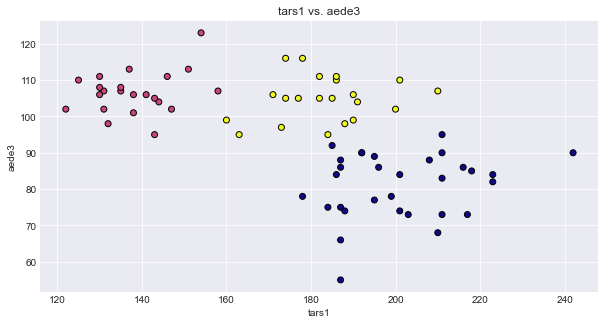

In [2]:
species_dict = {'Concinna ': 0, 'Heptapot. ': 1, 'Heikert. ':2}

df = pd.read_csv("data/flea.csv")

print(df.shape)
print(df.head())

df.replace(species_dict, inplace = True)
print(df.head())

plt.scatter(df['tars1'], df['aede3'], c = df['species'], cmap = 'plasma_r', edgecolors = 'black' )
plt.title('tars1 vs. aede3')
plt.xlabel('tars1')
plt.ylabel('aede3')
plt.show()

## Task 2: K-Means

### Part 1

1. Use the [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html) documentation to find out how to calculate K-Means on for the columns 'tars1' and 'aede3' using  kmeans2 
    1. Use 3 clusters and set the method of initialization to random. 
    1. Make sure to convert the data to floats, with `.astype('float')` before running the analysis.
2. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
    1. Graph 'tars1' on the x axis and 'aede3' on the y axis
    3. Have a title for each subplot, and axis labels.
    1. Graph the original data following the instructions from Part 1 in the first subplot. 
        1. Use the 'species' column of your data for the color with a black edgecolor
    1. Graph the results of K-means in the second subplot. [See example](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html)
        1. Graph the data colored by the clusters with the centroids labeled.  

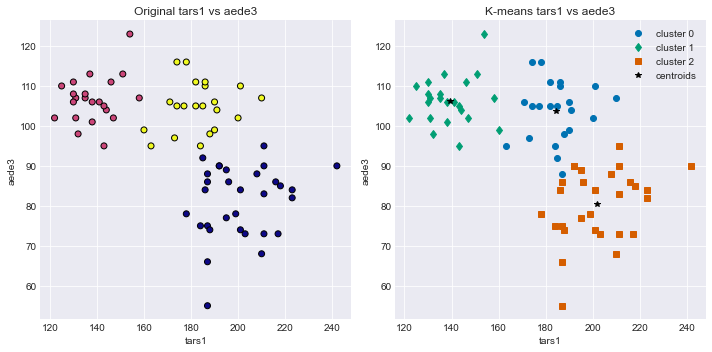

In [51]:
new = df[['tars1', 'aede3']].copy()
new = new.to_numpy()

data = new.astype('float')
centroid, label = kmeans2(data, 3, minit='++')

fig, ax = plt.subplots(1,2)
ax[0].set_title("Original tars1 vs aede3")
ax[0].scatter(df['tars1'], df['aede3'], c = df['species'], cmap = 'plasma_r', edgecolors = 'black' )
ax[0].set_xlabel('tars1')
ax[0].set_ylabel('aede3')

ax[1].set_title("K-means tars1 vs aede3")
ax[1].set_xlabel('tars1')
ax[1].set_ylabel('aede3')
w0 = data[label == 0]
w1 = data[label == 1]
w2 = data[label == 2]
plt.plot(w0[:, 0], w0[:, 1], 'o', label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 's', label='cluster 2')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.legend(shadow=True)

fig.tight_layout()
plt.show()

#### Question 1a: Run the code above multiple times without changing the code.  Do the clusters change?  Why or why not?

#### Answer 1a: Yes. Because the intialization of centroids is different everytime as we choose minit as "random", which would influence the final result of clusters.

#### Question 1b: Run the code above with different methods of initialization for the K-Means Algorithm.  How does the method of initialization effect the results?

#### Answer 1b: 

#### "random": result varies everytime we run it, giving centroids that are generally in the same position with some variance. Points on the margin change cluster often.

#### "points": clustering for each point is the same most times but sometimes points on the margin changes cluster.

#### "++": More stable but generally the same as the previews two: some changes on the margin.



### Part 2

1. Calculate K-Means on for the columns 'aede1' and 'aede2' using kmeans2 with 3 clusters and the method of initialization set to random. 
2. Graph the results of the clustering next in a plot next to the actual data. (2 subplots)
    1. Graph 'tars1' on the x axis and 'aede3' on the y axis
    3. Have a title for each subplot, and axis labels.
    1. Graph the original data following the instructions from Part 1 in the first subplot. 
        1. Use the 'species' column of your data for the color with a black edgecolor
    1. Graph the results of K-means in the second subplot. [See example](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html)
        1. Graph the data colored by the clusters with the centroids labeled.  

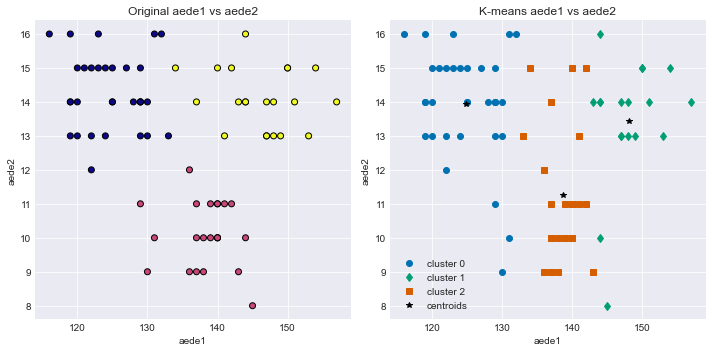

In [52]:
new = df[['aede1', 'aede2']].copy()
new = new.to_numpy()

data = new.astype('float')
centroid, label = kmeans2(data, 3, minit='random')

fig, ax = plt.subplots(1,2)
ax[0].set_title("Original aede1 vs aede2")
ax[0].scatter(df['aede1'], df['aede2'], c = df['species'], cmap = 'plasma_r', edgecolors = 'black' )
ax[0].set_xlabel('aede1')
ax[0].set_ylabel('aede2')

ax[1].set_title("K-means aede1 vs aede2")
ax[1].set_xlabel('aede1')
ax[1].set_ylabel('aede2')
w0 = data[label == 0]
w1 = data[label == 1]
w2 = data[label == 2]
plt.plot(w0[:, 0], w0[:, 1], 'o', label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 's', label='cluster 2')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.legend(shadow=True)

fig.tight_layout()
plt.show()

#### Question 2: Compare the graphs from Part 1 and 2.  In which case did K-means work better?  Why?

#### Answer 2: Part 1. In Part 1 points are more condense in the some places and sparse in others, giving lower variances, where as in Part 2 the points are more equally spreeding, giving higher variances.